# BigMart Sales Forecasting

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, I will try to understand the properties of products and outlets which play a key role in increasing sales.

The dataset used in this project is from Kaggle, created by Shivan Kumar: Big Mart Sales Prediction Datasets,

## Objective

Find out the features (properties) of a product, and store which impacts the sales of a product.

Variable Description
Item_Identifier ----- Unique product ID

Item_Weight ---- Weight of product

Item_Fat_Content ----- Whether the product is low fat or not

Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product

Item_Type ---- The category to which the product belongs

Item_MRP ----- Maximum Retail Price (list price) of the product

Outlet_Identifier ----- Unique store ID

Outlet_Establishment_Year ----- The year in which store store was established

Outlet_Size ----- The size of the store in terms of ground area covered

Outlet_Location_Type ---- The type of city in which the store is located

Outlet_Type ---- whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales ----- Sales of the product in t particular store. This is the outcome variable to be predicted.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import numpy as np

# Detect the file encoding
data_path = r"C:\Users\USER\Desktop\Data Anlyst Portafolio Data\SuperMarket Sales Forecast\sales_prediction.csv"
with open(data_path, "rb") as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

# Load dataset with detected encoding
df = pd.read_csv(data_path, encoding=encoding)

Detected encoding: ascii


In [2]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Prepare Training and Test Datasets

70% data for Train 30% data for Test seed = 42 reproducibility

In [3]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED=42

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [5]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

## Exploratory Data Analysis

In [7]:
# Data copy for exploration or modifications
X_train_c = X_train.copy()

In [8]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [9]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
num_data = X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [11]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [12]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

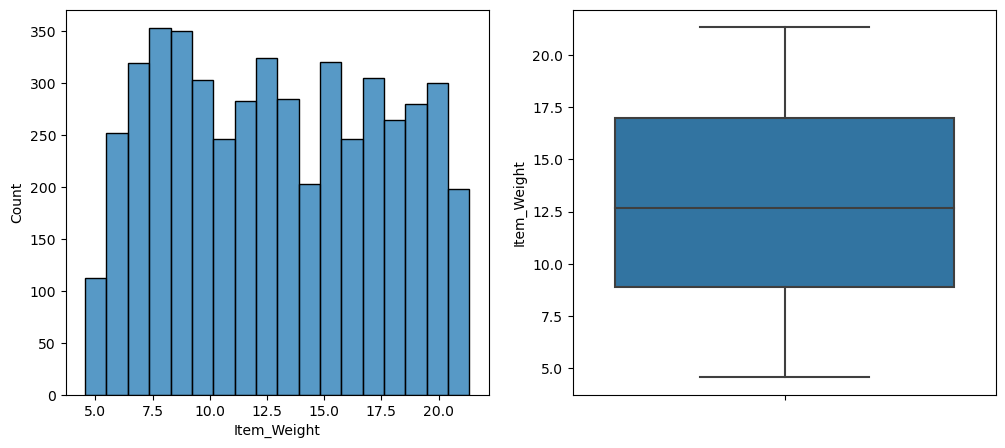

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_c, x='Item_Weight', ax=ax[0]);
sns.boxplot(data=X_train_c, y='Item_Weight', ax=ax[1]);

Uniform distribution

In [15]:
def visualize_numeric_feature(data_frame, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=data_frame, x=col_name, ax=ax[0])
    sns.boxplot(data=data_frame, y=col_name, ax=ax[1])

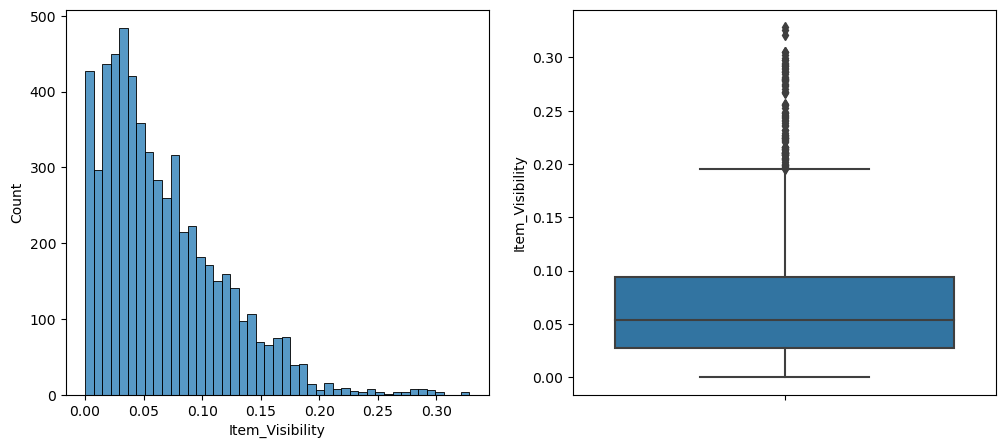

In [16]:
visualize_numeric_feature(X_train_c, 'Item_Visibility')

Righ Skewed sitribution

We have items which have a high visibility, in this situation we don´t remove the outliers becuase there could be a postive correlation between visibility and sales.

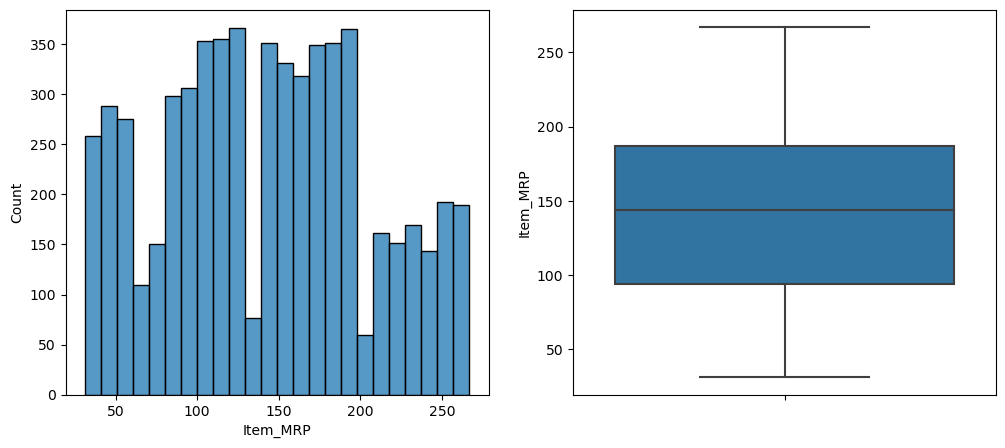

In [17]:
visualize_numeric_feature(X_train_c, 'Item_MRP')

Multi-modal distribution with different peaks

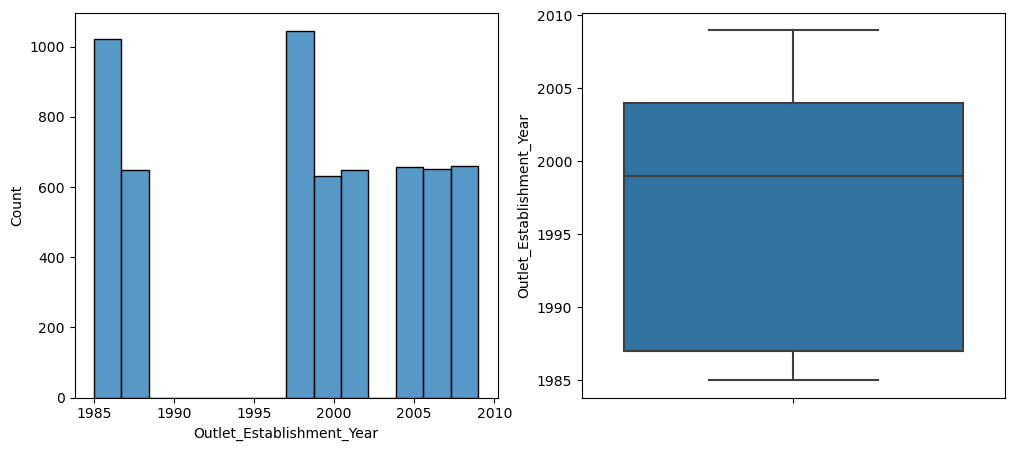

In [18]:
visualize_numeric_feature(X_train_c, 'Outlet_Establishment_Year')

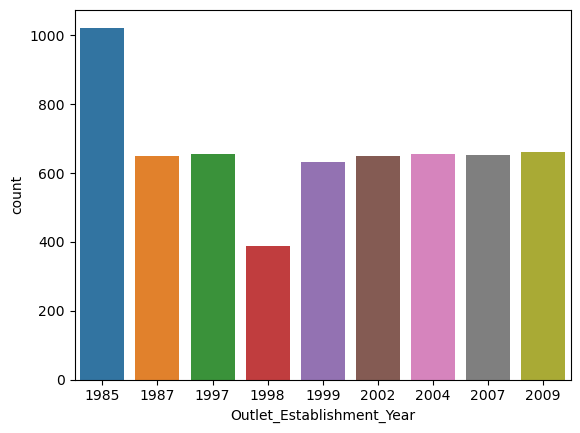

In [19]:
sns.countplot(data=X_train_c, x='Outlet_Establishment_Year');

Frequency of products being sold in different years

In [20]:
#Categorical columns overview

cat_features = X_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [21]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


Outlet_Size has some missing data and need to be handle. Categorical features have high cardinality which means features have a high number of distinct Categories

In [22]:
 cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

Outlet_Size has some missing data

In [23]:
cat_features['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [24]:
cat_features['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

#### Low Fat and Regular are shown in different ways and need to be standarized

In [25]:
cat_features['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

Diferent types as spected

In [26]:
cat_features['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [27]:
cat_features['Outlet_Size'].value_counts()

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [28]:
cat_features['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

In [29]:
cat_features['Outlet_Type'].value_counts()

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

## Data Wrangling & Feature Engineering

### Step 1 Create Hihg level Item Types

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

FD means Food items, DR Drink Items and NC Non-consumable items

In [30]:
X_train_c['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

For every row in the data show me only the first characters

In [31]:
# Step 1: Map Item IDs to Item Types
def create_item_type(data_frame):
    data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type'] = data_frame['Item_Type'].map({
        'FD' : 'Food',
        'NC' : 'Non_Consumables',
        'DR' : 'Drink'
    })
    return data_frame

In [32]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


### Step 2 Fill missing values for Item_Weight

In [33]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [34]:
X_train_c[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


Item_Identifier is duplicated but is not removed because in some store Weight information is not available, that´s the reason why duplicates did not remove it.

First level: Whenever I get any data frame I will look at the Item weight column if it is missing, it will go into the dictionary and will find the value for a particular key and then it will fill it with this value.

Second level: fill with the median

In [35]:
X_train_c[['Item_Type', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [36]:
# Step 2: Fill in missing values for Item Weight
# Logic
# 1st step: Use mapping of item ID - weight and fill in missing values
# 2nd step: If completely new item
# i.e item ID not in test \ live data use item type - median(weight) and fill in missing values

ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [37]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Type', aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)])

In [38]:
def impute_item_weight(data_frame):
    # 1st logic item id = weight
    data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    # 2nd logic item type - weight if any still missing
    data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

    return data_frame

In [39]:
X_train_c = impute_item_weight(X_train_c)

In [40]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Step 3 Fill missing values for Outlet_Size

In [41]:
X_train_c.groupby(by=['Outlet_Type', 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [42]:
from scipy.stats import mode

# Step 1: Calculate the mode for each Outlet_Type without modifying the DataFrame
OUTLET_TYPE_SIZE_PIVOT = X_train_c.pivot_table(
    values='Outlet_Size', 
    index='Outlet_Type',
    aggfunc=lambda x: mode(x.dropna(), nan_policy='omit', keepdims=True).mode[0]
).reset_index()

# Step 2: Create the mapping dictionary
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))

# Print the mapping dictionary to verify
print(OUTLET_TYPE_SIZE_MAPPING)

{'Grocery Store': 'Small', 'Supermarket Type1': 'Small', 'Supermarket Type2': 'Medium', 'Supermarket Type3': 'Medium'}


C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [43]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [44]:
def impute_outlet_size(data_frame):
    # 1st logic Outlet_Type - mode(Outlet_Size)
    data_frame.loc[:, 'Outlet_Size'] = data_frame.loc[:, 'Outlet_Size'].fillna(data_frame.loc[:, 'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))

    return data_frame

In [45]:
X_train_c = impute_outlet_size(X_train_c)

In [46]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Step 4 Standardize Item_Fat_Content categories

In [47]:
X_train_c['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [48]:
# Step 4: Make Item Fat Content categories consistent

def standardize_item_fat_content(data_frame):
    data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({
        'Low Fat' : 'Low_Fat',
        'LF' : 'Low_Fat',
        'reg' : 'Regular',
        'low fat' : 'Low_Fat'
    })
    return data_frame

In [49]:
X_train_c = standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

### Step 5 Correct Item fat content for non-consumables

In [50]:
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Low_Fat             1137
dtype: int64

In [51]:
X_train_c.loc[X_train_c['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [52]:
# Step 5: Correct Item fat content for non-consumables

def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Non_Edible'
    return data_frame

X_train_c = correct_item_fat_content(X_train_c)
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [53]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 688.4+ KB


### Prepare Datasets for ML

In [54]:
def prepare_dataset(data_frame):

    # Step 1: Create Item Type
    data_frame = create_item_type(data_frame)

    # Step 2: Fill in missing values for Item_Weight
    data_frame = impute_item_weight(data_frame)

    # Step 3: Impute missing values for Outlet_Size
    data_frame = impute_outlet_size(data_frame)

    # Step 4: Make Item Fat Content categories consistent
    data_frame = standardize_item_fat_content(data_frame)

    # Step 5: Correct Item fat content for non-consumables
    data_frame = correct_item_fat_content(data_frame)

    return data_frame

In [55]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [56]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [57]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [58]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Handling Categorical Data
#### Exp 1: All categorical columns - one hot encoded

In [59]:
cat_feats = X_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [60]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [61]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [62]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [63]:
cat_feats_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [64]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [65]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [66]:
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Modeling

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

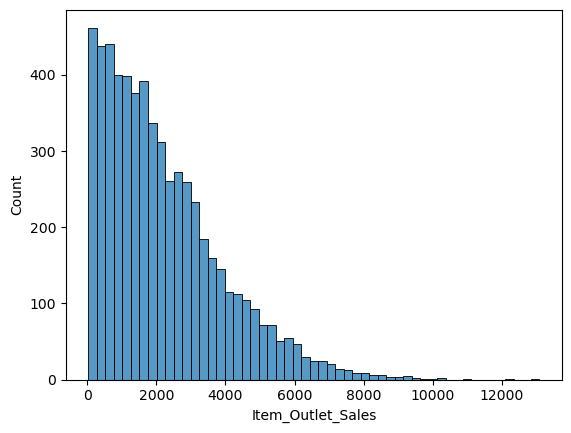

In [67]:
sns.histplot(y_train)

In [68]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

In [69]:
def train_and_eval_model(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'))
    print('Model:', model)
    r2_scores = cv_results['test_r2']
    print('R2 CV scores:', r2_scores)
    print('R2 CV scores mean / stdev:', np.mean(r2_scores), '/', np.std(r2_scores))

    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1*score for score in rmse_scores]
    print('RMSE CV scores:', rmse_scores)
    print('RMSE CV scores mean / stdev:', np.mean(rmse_scores), '/', np.std(rmse_scores))

In [70]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, X_train=X_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
R2 CV scores mean / stdev: 0.5429242875459817 / 0.01828158855152387
RMSE CV scores: [1104.0666302663794, 1168.4808032468748, 1180.6054342042014, 1154.4334423647522, 1202.0836655939197]
RMSE CV scores mean / stdev: 1161.9339951352256 / 32.888811410647826


In [72]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6065274  0.59366925 0.57356358 0.60924345 0.55022613]
R2 CV scores mean / stdev: 0.5866459646024772 / 0.022148578096336337
RMSE CV scores: [1056.8793046591481, 1082.786581771003, 1140.2068860094903, 1080.838373141466, 1163.8349579736446]
RMSE CV scores mean / stdev: 1104.9092207109504 / 40.23395923794627


In [73]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model= hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean / stdev: 0.5613284973532673 / 0.0205841656268121
RMSE CV scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV scores mean / stdev: 1138.235415343526 / 35.957026103361265


In [80]:
xgr = xgb.XGBRegressor( objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 CV scores mean / stdev: 0.5577825481764618 / 0.021778582707669483
RMSE CV scores: [1095.416494682338, 1127.8526118741622, 1178.792371186943, 1115.290340217991, 1196.893076803

In [83]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

In [84]:
X_train_copy = X_train.copy().drop(columns='Item_Identifier')

cat_cols = X_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [85]:
X_train_copy[cat_cols] = X_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
X_train_copy = X_train_copy[cat_cols + num_cols]

X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 398.1 KB


In [86]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42, categorical_features=categorical_mask
    ),
)

train_and_eval_model(model=hgb, X_train=X_train_copy, y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D1071E8880>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                     

In [87]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of 

### Handling Categorical Data
#### Expt 3: No Item Identifier - one hot encoded

In [88]:
X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [90]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [91]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumables,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [92]:
X_train_final.shape

(5966, 30)

In [93]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 CV scores mean / stdev: 0.5891824563495011 / 0.01880337124010431
RMSE CV scores: [1061.9286612011877, 1094.5675808387577, 1135.1580306171122, 1069.8223327510743, 1146.040671315857]
RMSE CV scores mean / stdev: 1101.5034553447979 / 33.864902948875674


In [94]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model= hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean / stdev: 0.5613284973532673 / 0.0205841656268121
RMSE CV scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV scores mean / stdev: 1138.235415343526 / 35.957026103361265


In [95]:
xgr = xgb.XGBRegressor( objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.52348154 0.47860959 0.45772502 0.49196841 0.46576096]
R2 CV scores mean / stdev: 0.48350910211416415 / 0.023122182697374725
RMSE CV scores: [1163.075778281383, 1226.547983760074, 1285.7789125594438, 1232.403674476319, 1268.41713837

### Handling Categorical Data
#### Expt 4:Item Identifier - feature hashed, rest categorical - one hot encoded

In [97]:
X_train['Item_Identifier'].head()

1921    FDN08
655     NCJ42
2229    FDY47
2537    FDN45
3528    FDY16
Name: Item_Identifier, dtype: object

In [96]:
from sklearn.feature_extraction import FeatureHasher

hash_vector_size = 50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')
hashed_df = pd.DataFrame(fh.transform(X_train['Item_Identifier']).toarray(),
                         columns=['H' + str(i) for i in range(hash_vector_size)])
hashed_df.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [99]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train, hashed_df, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [100]:
X_train_final.shape

(5966, 80)

In [101]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model= hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.57112928 0.54632393 0.54394452 0.59656053 0.54665091]
R2 CV scores mean / stdev: 0.56092183595542 / 0.02039262730858387
RMSE CV scores: [1103.3958453566315, 1144.1315363460883, 1179.1399565120698, 1098.2388784421416, 1168.4514237526794]
RMSE CV scores mean / stdev: 1138.6715280819221 / 32.9651953570445


In [102]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60925032 0.58397322 0.5751741  0.62583265 0.55910308]
R2 CV scores mean / stdev: 0.5906666737420407 / 0.02392939856791301
RMSE CV scores: [1053.2160345502873, 1095.6293690709922, 1138.0517459234395, 1057.6465771457638, 1152.292730312246]
RMSE CV scores mean / stdev: 1099.3672914005458 / 40.452732110104556


In [103]:
X_test.shape

(2557, 11)

In [104]:
hashed_test_df = pd.DataFrame(fh.transform(X_test['Item_Identifier']).toarray(),
                              columns=['H' + str(i) for i in range(hash_vector_size)])
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test, hashed_test_df, X_test_cat_ohe], axis=1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [105]:
X_test_final.shape

(2557, 80)

In [106]:
gb = GradientBoostingRegressor(random_state=SEED)
gb.fit(X_train_final, y_train)

GradientBoostingRegressor(random_state=42)

In [107]:
y_pred = gb.predict(X_test_final)

In [109]:
from sklearn.metrics import r2_score, mean_squared_error

In [110]:
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE Score:', mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.5973641182370731
RMSE Score: 1061.970102545934


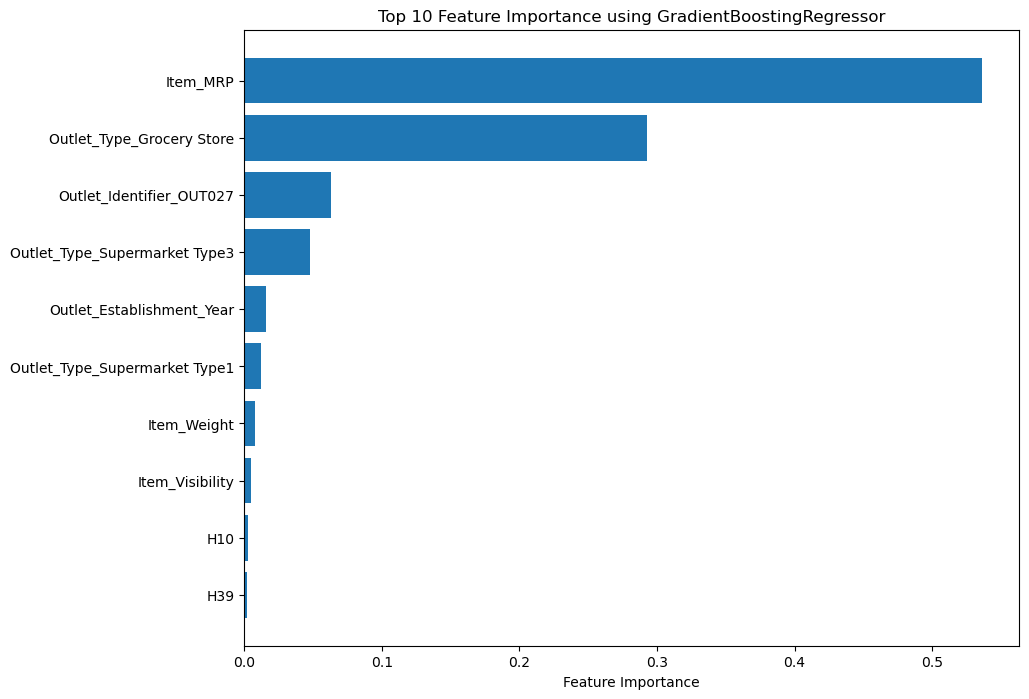

In [113]:
import matplotlib.pyplot as plt
import numpy as np

  # Get feature importances
feature_importance = gb.feature_importances_

# Sort the feature importances
sorted_idx = np.argsort(feature_importance)[-10:]  # Show only the top 10 features

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
ax.set_yticks(range(len(sorted_idx)))
ax.set_yticklabels(np.array(X_train_final.columns)[sorted_idx])
ax.set_xlabel("Feature Importance")
ax.set_title("Top 10 Feature Importance using GradientBoostingRegressor")
plt.show()

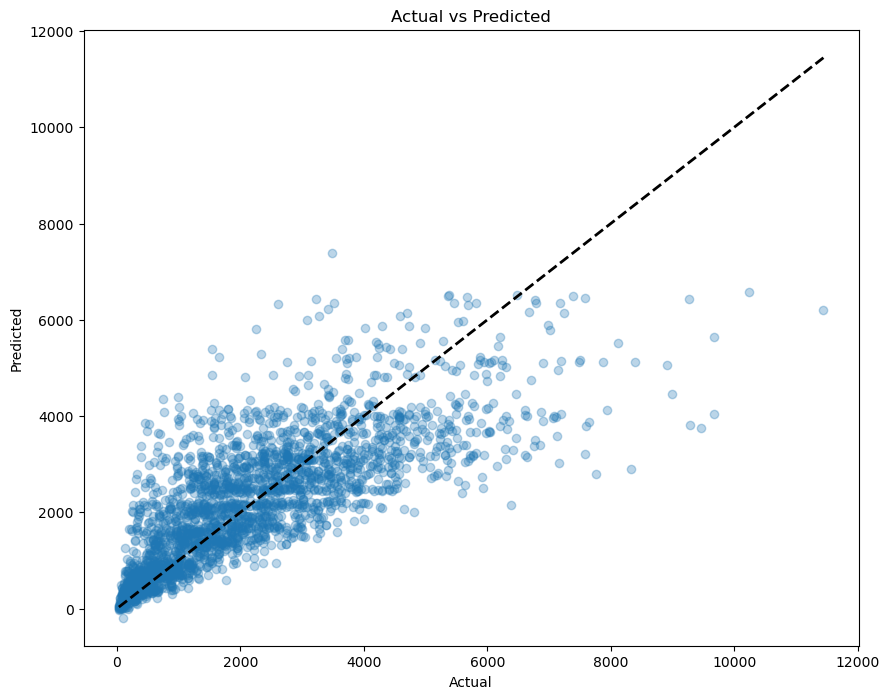

In [115]:
import matplotlib.pyplot as plt


# y_test are the actual values and y_pred are the predicted values

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()